<a href="https://colab.research.google.com/github/murarivakada/Basic-ML/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Mart sales preditction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


READ THE DATA

In [ ]:
train_df=pd.read_csv('Train.csv')
test_df=pd.read_csv('Test.csv')

In [ ]:
test1_df=test_df.copy()


#Data Exploration / Analysis and Data Cleaning


In [ ]:
test1_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
train_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train_df.shape,test_df.shape



((8523, 12), (5681, 11))

In [ ]:
train_df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
cat_cols=train_df.select_dtypes([object])
num_cols=train_df.select_dtypes(exclude=[object])


In [ ]:
cat_cols.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)


#Searching null values


In [ ]:
train_df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test_df.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(),inplace=True)
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0],inplace=True)


In [ ]:
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(),inplace=True)
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0],inplace=True)


In [ ]:
train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [ ]:
test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [ ]:
for col in cat_cols.columns:
    print(col)
    print(train_df[col].value_counts())
    print('--------------------------------------------------------------------------')


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
--------------------------------------------------------------------------
Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
--------------------------------------------------------------------------
Outlet_Location_Type
Tier 3    3

In [ ]:
train_df[['Item_Fat_Content']].value_counts()


Item_Fat_Content
Low Fat             5089
Regular             2889
LF                   316
reg                  117
low fat              112
dtype: int64

In [ ]:
# Combine fat content
train_df['Item_Fat_Content']=train_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})


In [ ]:
# Reducing values for outlet year
train_df['Outlet Years']=2013-train_df['Outlet_Establishment_Year']

test_df['Outlet Years']=2013-test_df['Outlet_Establishment_Year']


In [ ]:
test1_df['Outlet Years']=2013-test1_df['Outlet_Establishment_Year']


In [ ]:
train_df


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [ ]:
test_df


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet Years
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,14
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1,6
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store,15
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1,6
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,28
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,16
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,4
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1,11
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1,6


# DATA VISULZATION

##Displot

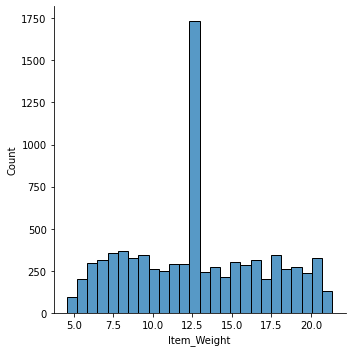

In [ ]:
sns.displot(train_df['Item_Weight'])


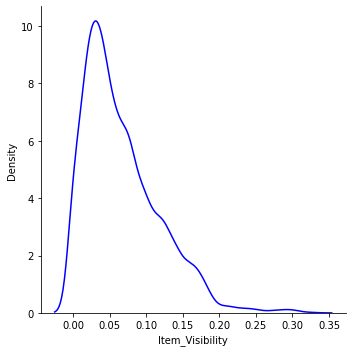

In [ ]:
sns.displot(train_df['Item_Visibility'],kind='kde',color='blue')


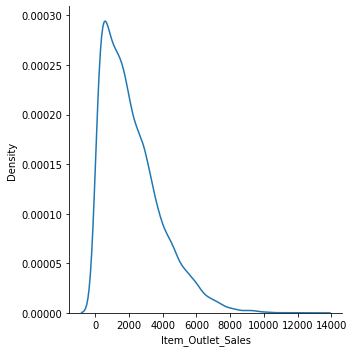

In [ ]:
sns.displot(train_df['Item_Outlet_Sales'],kind='kde')


In [ ]:
train_df['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

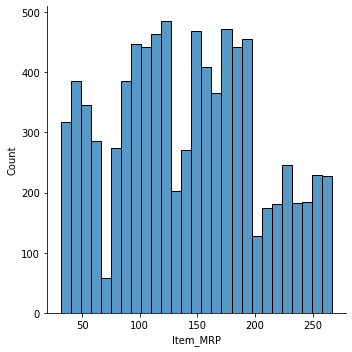

In [ ]:
sns.displot(train_df['Item_MRP'],kind='hist')


##COUNT PLOT

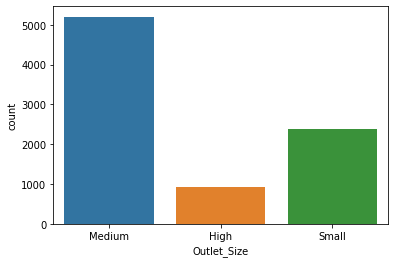

In [ ]:
sns.countplot(train_df['Outlet_Size'])


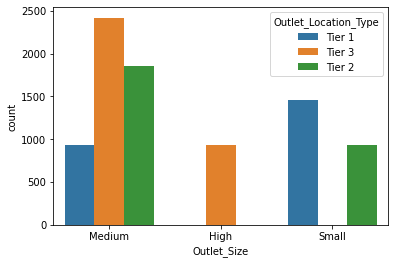

In [ ]:
sns.countplot(train_df['Outlet_Size'],hue=train_df['Outlet_Location_Type'])


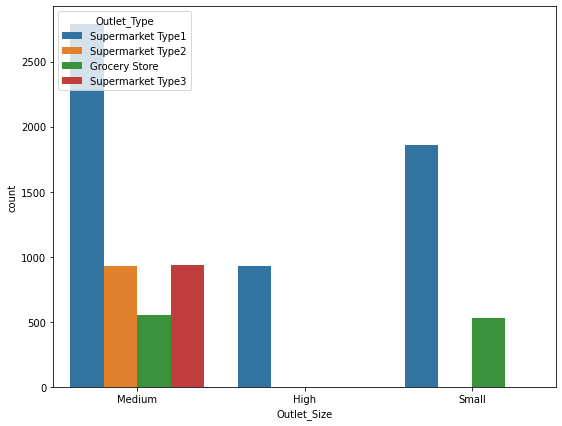

In [ ]:
fig, ax = plt. subplots(figsize = (9, 7))
sns.countplot(train_df['Outlet_Size'],hue=train_df['Outlet_Type'])

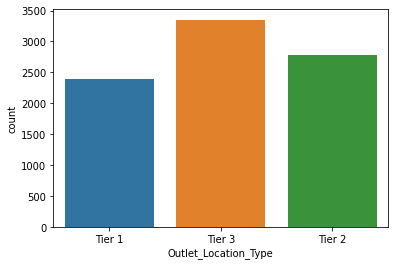

In [ ]:
sns.countplot(train_df['Outlet_Location_Type'])


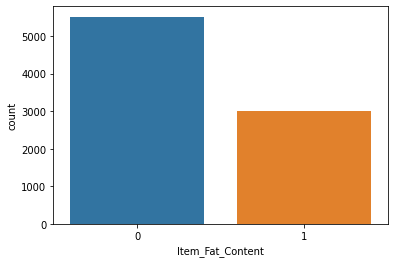

In [ ]:
sns.countplot(train_df['Item_Fat_Content'])


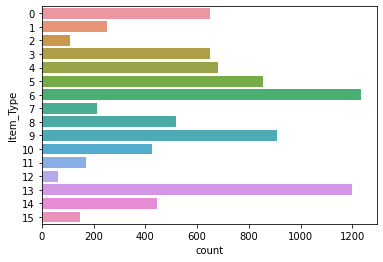

In [ ]:
sns.countplot(y=train_df['Item_Type'])


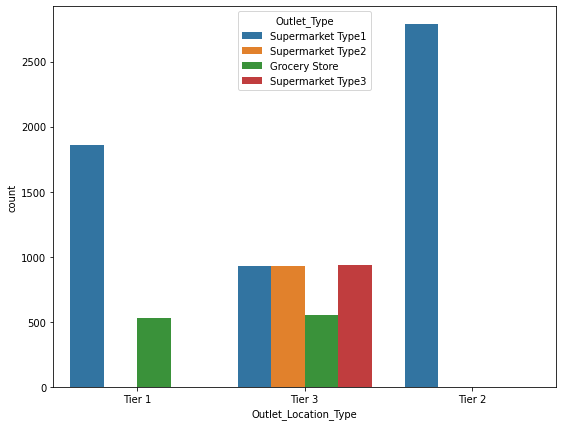

In [ ]:
fig, ax = plt. subplots(figsize = (9, 7))
sns.countplot(train_df['Outlet_Location_Type'],hue=train_df['Outlet_Type'])


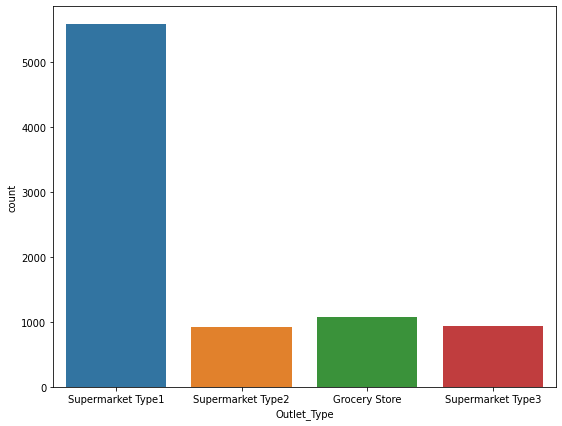

In [ ]:
fig, ax = plt. subplots(figsize = (9, 7))
sns.countplot(train_df['Outlet_Type'])


BAR PLOT

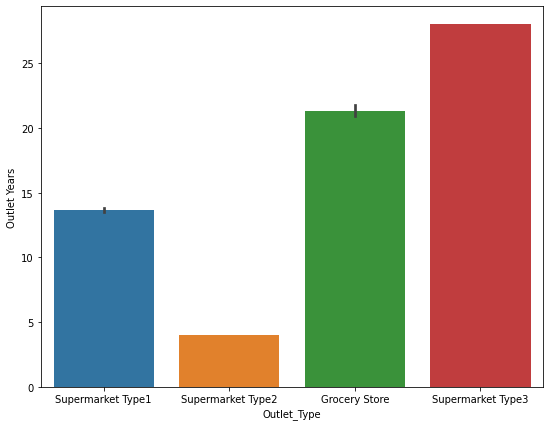

In [ ]:
fig, ax = plt. subplots(figsize = (9, 7))
sns.barplot(train_df['Outlet_Type'],train_df['Outlet Years'])


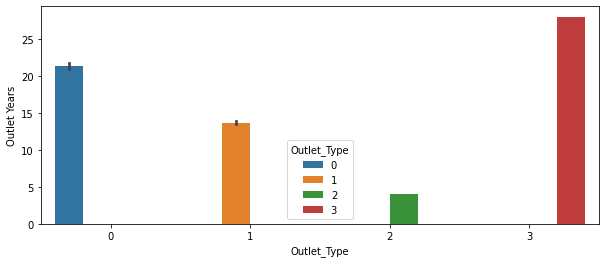

In [ ]:
fig, ax = plt. subplots(figsize = (10, 4))
sns.barplot(train_df['Outlet_Type'],train_df['Outlet Years'],hue=train_df['Outlet_Type'])

##Box plot

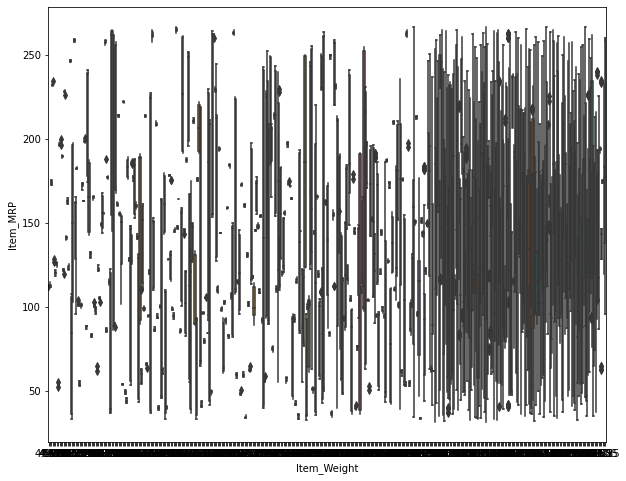

In [ ]:
plt.figure(figsize=(10,8))

sns.boxplot(x='Item_Weight',y='Item_MRP',data=train_df,palette='Dark2_r')


#Violin plot

In [ ]:
import plotly.express as px
px.violin(train_df,y='Item_Weight',x = 'Outlet_Type', color = 'Outlet_Type')


##SCATTER PLOT

In [ ]:
px.scatter(train_df,x='Item_MRP',y='Item_Weight')


##PAIR PLOT

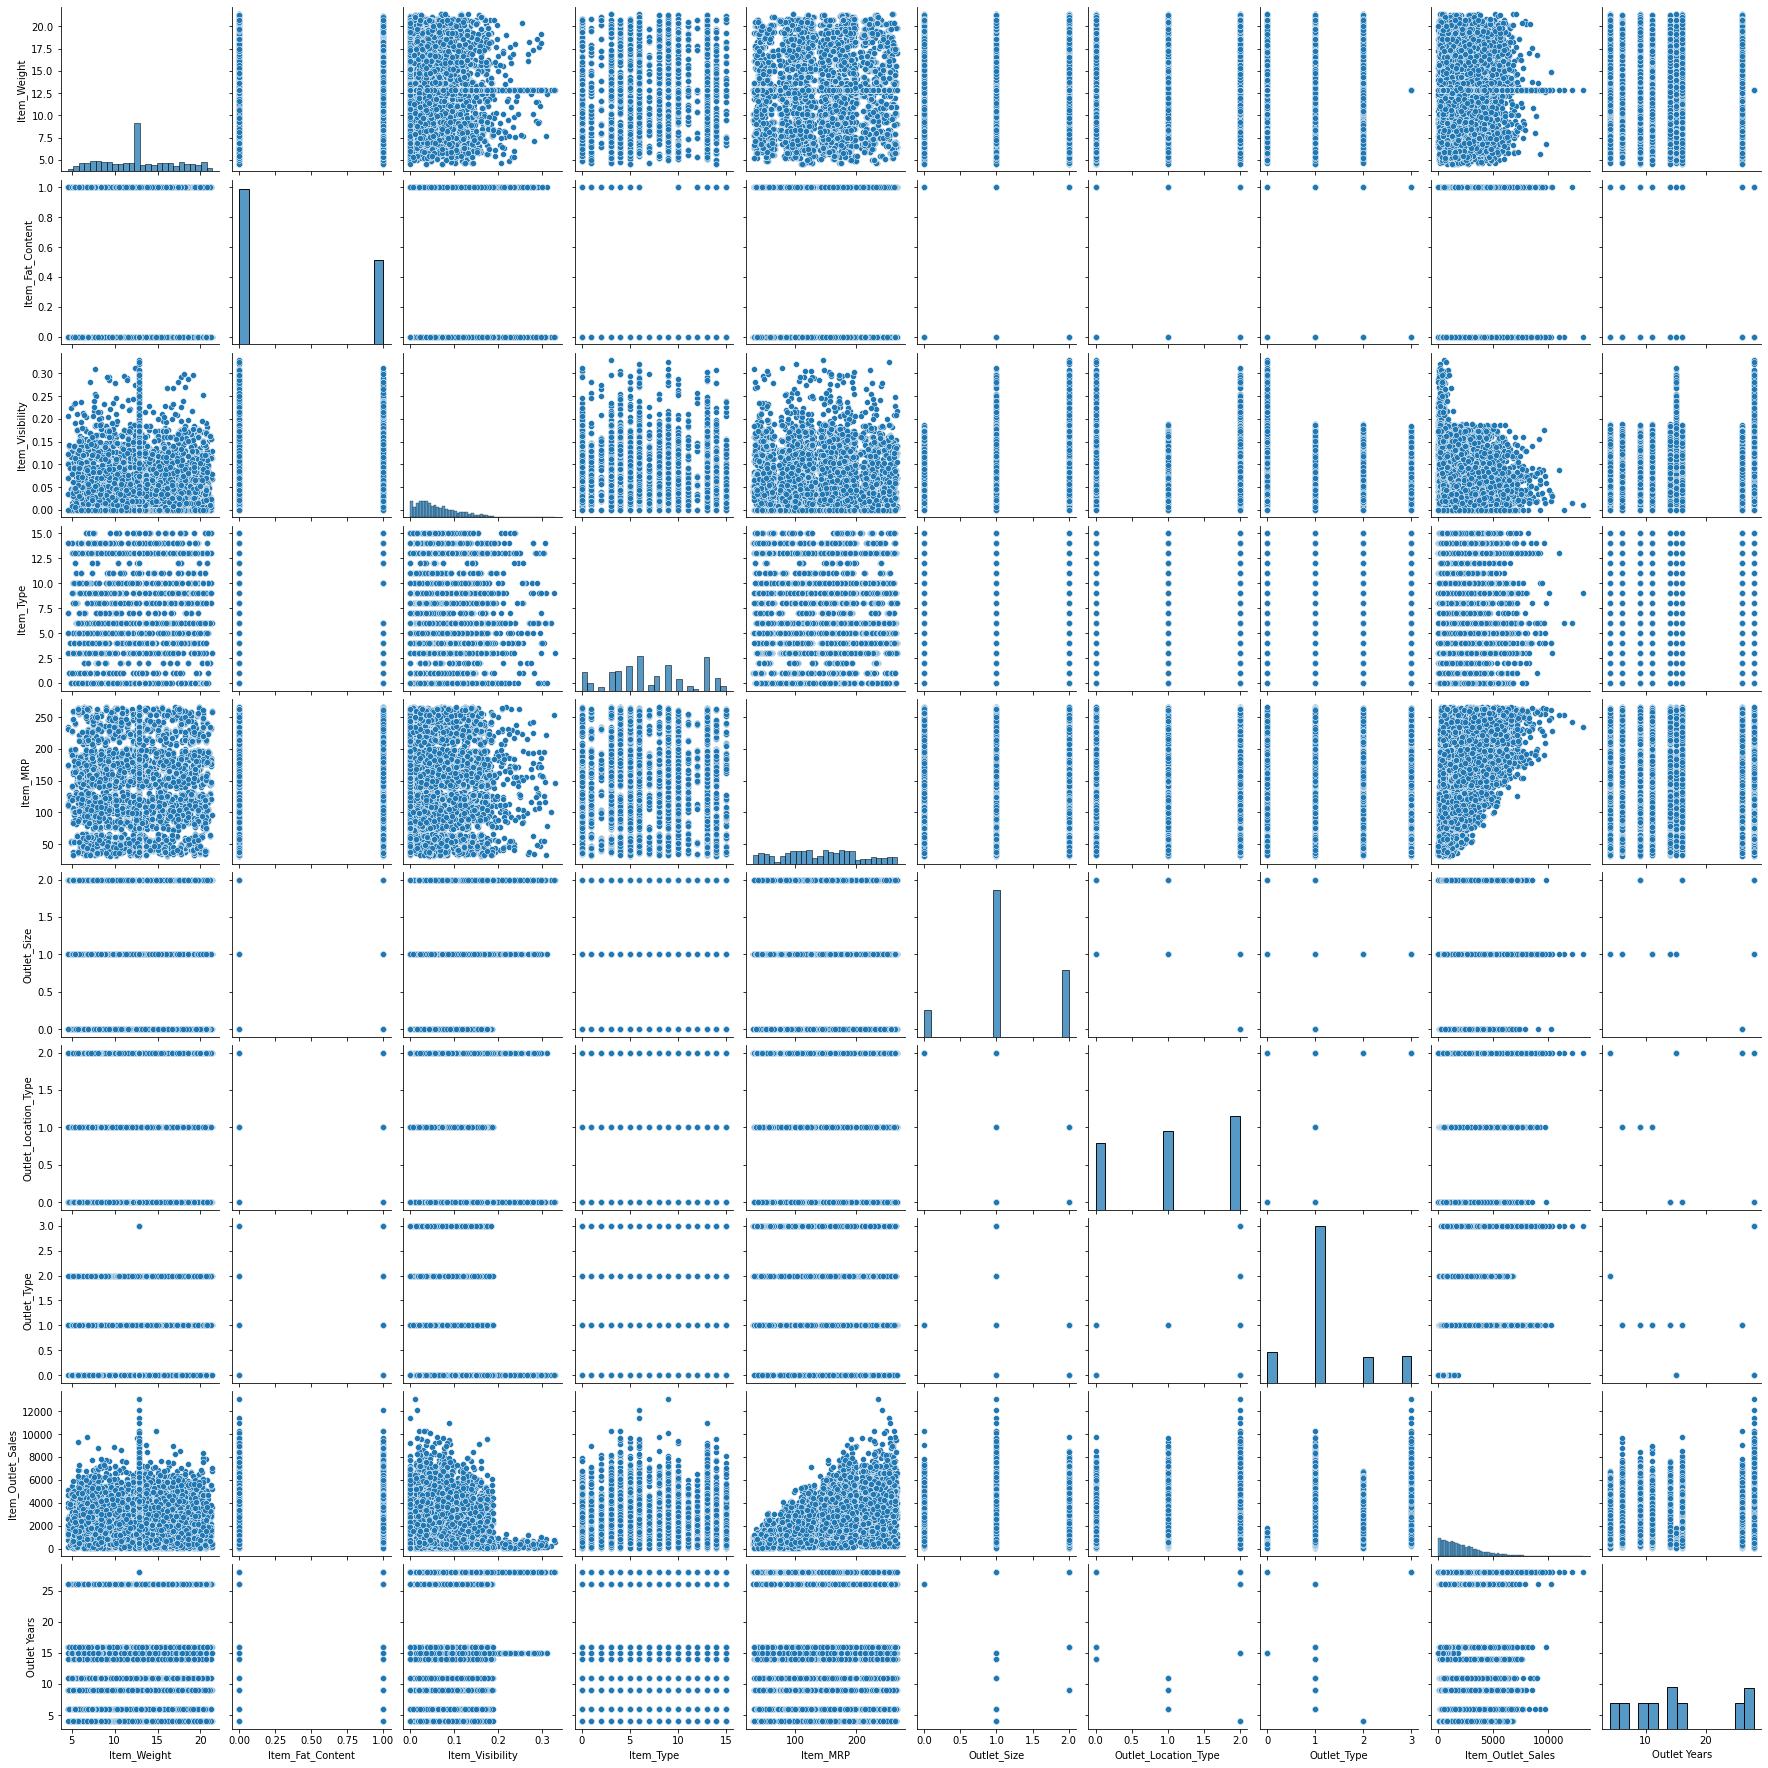

In [ ]:
sns.pairplot(train_df)

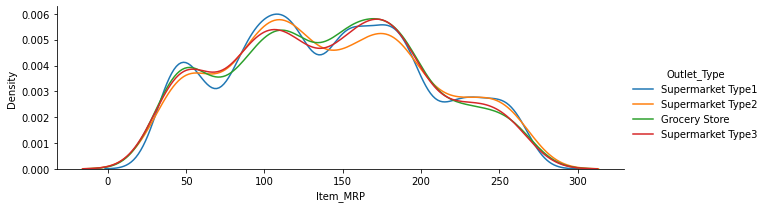

In [ ]:
grid = sns.FacetGrid(train_df,hue='Outlet_Type',aspect=3)
grid.map(sns.kdeplot,'Item_MRP')
grid.add_legend()


##LINE PLOT

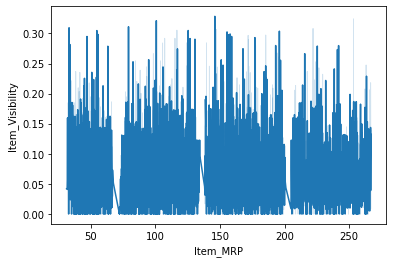

In [ ]:
sns.lineplot(data=train_df,x='Item_MRP',y='Item_Visibility')


##HISTPlot

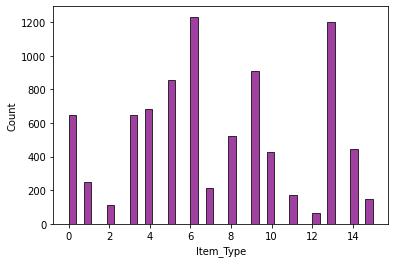

In [ ]:
sns.histplot(train_df['Item_Type'].dropna(),color='purple',bins=40)


##HEAT PLOT

In [ ]:
#Checking for correlation
corr=train_df.corr()
corr


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet Years
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000,0.049135
Outlet Years,0.008301,0.074834,-0.005020,-1.000000,0.049135,1.000000


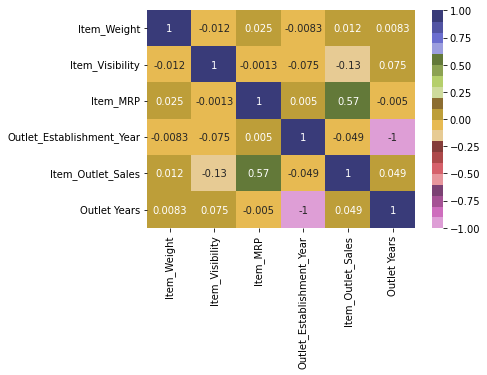

In [ ]:
sns.heatmap(corr,annot=True,cmap='tab20b_r')


DATA Cleaning

In [ ]:
train_df.drop('Outlet_Establishment_Year',axis=1,inplace=True)


In [ ]:
test_df.drop('Outlet_Establishment_Year',axis=1,inplace=True)


In [ ]:
train_df


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,15
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [ ]:
test_df


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet Years
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,14
1,8.300000,reg,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,6
2,14.600000,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,15
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,6
4,12.695633,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,28
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,16
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,4
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,Medium,Tier 2,Supermarket Type1,11
5679,15.300000,Regular,0.000000,Canned,214.6218,Medium,Tier 2,Supermarket Type1,6


In [ ]:
train_df


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,15
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [ ]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
list_cat=list(cat_cols.columns)
train_df[list_cat] =train_df[list_cat].apply(le.fit_transform)


In [ ]:
test_df[list_cat] =test_df[list_cat].apply(le.fit_transform)


In [ ]:
train_df


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380,14
1,5.920,1,0.019278,14,48.2692,1,2,2,443.4228,4
2,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700,14
3,19.200,1,0.000000,6,182.0950,1,2,0,732.3800,15
4,8.930,0,0.000000,9,53.8614,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834,26
8519,8.380,1,0.046982,0,108.1570,1,1,1,549.2850,11
8520,10.600,0,0.035186,8,85.1224,2,1,1,1193.1136,9
8521,7.210,1,0.145221,13,103.1332,1,2,2,1845.5976,4


In [ ]:
test_df


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet Years
0,20.750000,1,0.007565,13,107.8622,1,0,1,14
1,8.300000,4,0.038428,4,87.3198,1,1,1,6
2,14.600000,1,0.099575,11,241.7538,1,2,0,15
3,7.315000,1,0.015388,13,155.0340,1,1,1,6
4,12.695633,2,0.118599,4,234.2300,1,2,3,28
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,2,0,1,16
5677,7.600000,2,0.142991,15,169.1448,1,2,2,4
5678,10.000000,1,0.073529,8,118.7440,1,1,1,11
5679,15.300000,2,0.000000,3,214.6218,1,1,1,6


# Model building


In [ ]:
x=train_df.drop('Item_Outlet_Sales',axis=1)
y=train_df['Item_Outlet_Sales']


##Splitting data for Training and Testing


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train",x_train)
print("x_test",x_test)
print("y_train",y_train)
print("y_test",y_test)


x_train       Item_Weight  Item_Fat_Content  ...  Outlet_Type  Outlet Years
549         9.500                 1  ...            1            14
7757       18.000                 0  ...            1            11
764        17.600                 1  ...            1            16
6867        8.325                 0  ...            1            11
2716       12.850                 0  ...            1            16
...           ...               ...  ...          ...           ...
5734        9.395                 1  ...            0            15
5191       15.600                 0  ...            1             6
5390       17.600                 0  ...            1            11
860        20.350                 0  ...            1             6
7270       16.350                 0  ...            1            16

[6818 rows x 9 columns]
x_test       Item_Weight  Item_Fat_Content  ...  Outlet_Type  Outlet Years
7503    14.300000                 0  ...            1            26
2957    

In [ ]:
len(x_train), len(x_test)


(6818, 1705)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
RandomForestRegressor = rfc.score(x_test, y_test)


#DecisionTree Regressor


In [ ]:
dt_model=DecisionTreeRegressor()  # We normalize our data for better results
dt_model.fit(x_train,y_train)

y4_pred=dt_model.predict(x_test)


result4=cross_val_score(dt_model,x_train,y_train,cv=KFold(10))


print(result4)
print('---------------------------')
print('CV :',np.mean(result4))
print('---------------------------')
print('MSE:',mean_squared_error(y4_pred,y_test))
print('---------------------------')
print('MAE :',mean_absolute_error(y4_pred,y_test))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y4_pred,y_test)))
print('---------------------------')
print('R2:',r2_score(y4_pred,y_test))

[0.14857275 0.15418651 0.24483071 0.16267134 0.14258457 0.11544879
 0.12478991 0.26642433 0.1420452  0.14653768]
---------------------------
CV : 0.16480917822432628
---------------------------
MSE: 2228736.6105309445
---------------------------
MAE : 1025.0219441642228
---------------------------
RMSE: 1492.8953782937854
---------------------------
R2: 0.24334339321864507


Hyperparameter Tuning
Randomized CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[200,400,600,800,1000,1200]

max_features=['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
            #'criterion':['mse','mae']}

In [ ]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [ ]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)


In [ ]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_randomized.best_params_


{'max_depth': 670,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_final=rf_randomized.best_estimator_


In [ ]:
y_pred_random=rf_final.predict(x_test)


In [ ]:
y_pred_random

array([1069.39143977,  879.76083371,  758.14474818, ...,  785.36059463,
        781.87749511, 1587.98209603])

##SUMMARY

We started with the data exploration where we got a feeling for the dataset,checked about missing data and learned which features are important.During this process we used seaborn and matplotllib to do the visualisation.we droped some of the unwanted columns. Afterwards we started training MachineLearning models and predictions

1)EXPLORATORY DATA ANALYSIS Exploratory data analysis is the analysis of the data and brings out the insights. EDA is an approach to analyse the data with the help of various tools and graphical techniques like barplot, histogram etc.There are many libraries available in python like pandas, NumPy,matplotlib, seaborn etc. with the help of those we can do the analysis of the data.





2)DATA CLEANING Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and
algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset.





3)SPLIT YOUR DATA WITH 80-20%% The most common split ratio is 80:20. That is 80% of the dataset goes into the training set and 20% of the dataset goes into the testing set. Before splitting the data, make sure that the dataset is large enough. Train/Test split works well with large datasets.The train-test split
procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive
modeling problem.






4)MACHINE LEARNING MODELS *Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so. Machine learning algorithms use historical data as input to predict new output

